<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/Project_Banknote_Authentication_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
notes=pd.read_csv('banknotes.csv')
notes.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

![](notes.jpg)

1.Import seaborn as sns.

2.Use seaborn's pairplot() on banknotes and set 
hue to be the variable containing the labels.

4.Generate descriptive statistics for the banknotes authentication data.

5.Count the number of observations of each class.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


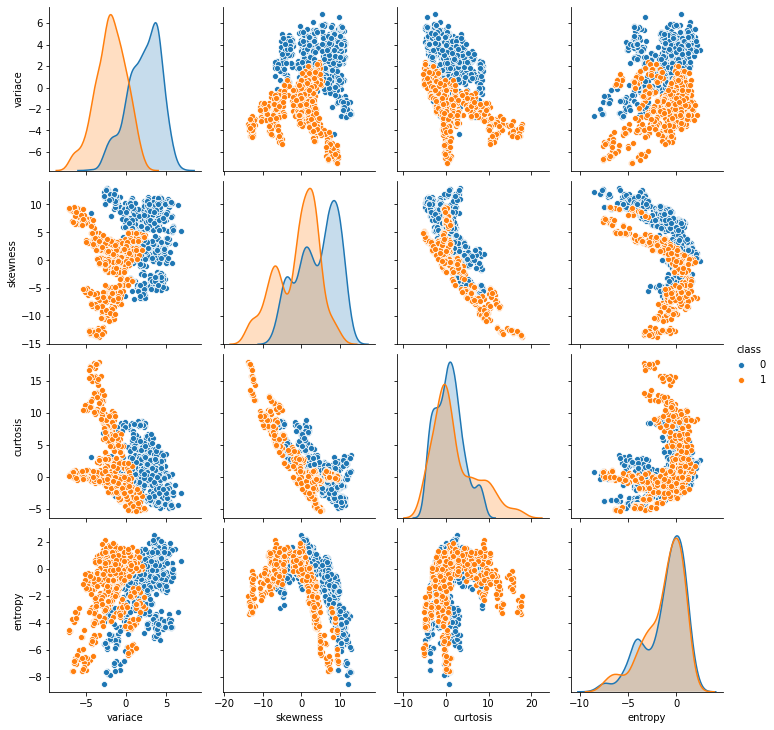

In [4]:
sns.pairplot(notes,hue='class')
plt.show()

In [5]:
notes.describe()

variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [6]:
#observations in each class
notes['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [0]:
'''for binary classification just use a single putput neuron ..use sigmoid 
so we get 1 or 0 outout..let there be only 1 layer..with the inputs and 
1 output with the activation'''

'for binary classification just use a single putput neuron ..use sigmoid \nso we get 1 or 0 outout..let there be only 1 layer..with the inputs and \n1 output with the activation'

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
model=models.Sequential()
model.add(layers.Dense(1,input_shape=(4,),activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# before fitting the model we need to split the data

In [0]:
'''metrics: List of metrics to be evaluated by the model during training
        and testing. Typically you will use `metrics=['accuracy']`.
        To specify different metrics for different outputs of a
        multi-output model, you could also pass a dictionary, such as
        `metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}`.'''

"metrics: List of metrics to be evaluated by the model during training\n        and testing. Typically you will use `metrics=['accuracy']`.\n        To specify different metrics for different outputs of a\n        multi-output model, you could also pass a dictionary, such as\n        `metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}`."

In [0]:
X=notes.loc[:,'variace':'entropy']
y=notes.loc[:, ['class']]

In [0]:
# before fitting the model we need to split the data
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.30)

In [12]:
[X_train.shape ,X_test.shape,y_train.shape,y_train.shape]

[(960, 4), (412, 4), (960, 1), (960, 1)]

In [0]:
#not fit the model
model.fit(X_train,y_train,epochs=20)

In [14]:
accuracy=model.evaluate(X_test,y_test)
print('accuracy=',accuracy)

13/13 [==============================] - 0s 1ms/step - loss: 1.0616 - accuracy: 0.5704
accuracy= [1.0615767240524292, 0.5703883767127991]


In [0]:
[X_train.shape ,X_test.shape,y_train.shape,y_train.shape]

[(960, 4), (412, 4), (960, 1), (960, 1)]

In [0]:
history=model.fit(X,y,validation_split=0.3,epochs=50)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss,color='red')
    plt.plot(val_loss,color='green')
    plt.legend(['Train','Test'])
    plt.xlabel('EPOCH')
    plt.ylabel('Loss')
    plt.show()
    

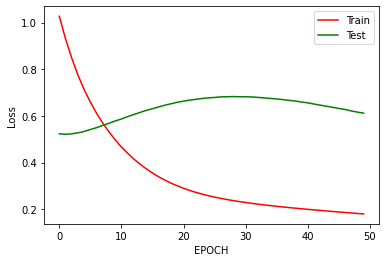

In [20]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [0]:
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc,color='red')
    plt.plot(val_acc,color='green')
    plt.legend(['Train','Test'])
    plt.xlabel('EPOCH')
    plt.ylabel('Accuracy')
    plt.show()

In [23]:
for i in history.history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


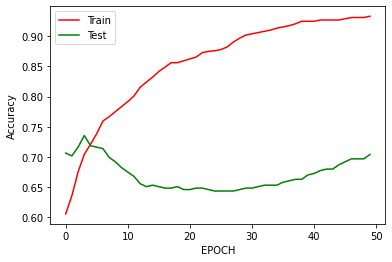

In [24]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

# Using EarlyStopping & ModelCheckpoint 
## we can use both in the fit method 
### with EarlyStopping we can monitor model accuracy or loss and stop the model early for some patience number
###  with the ModelCheckpoint we will be able to save the best model

In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
monitor_accuracy=EarlyStopping(monitor='val_accuracy',patience=6)
model_checkpoint=ModelCheckpoint('best_banknote_model.hdf5',save_best_only=True)

In [40]:
history=model.fit(X,y,epochs=500000,validation_split=0.3,callbacks=[monitor_accuracy,model_checkpoint])

Epoch 1/500000
30/30 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9879
Epoch 2/500000
30/30 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9879
Epoch 3/500000
30/30 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 4/500000
30/30 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 5/500000
30/30 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 6/500000
30/30 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 7/500000
30/30 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy:

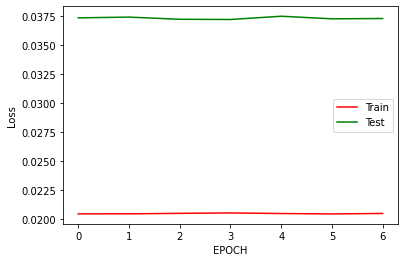

In [41]:
plot_loss(history.history['loss'],history.history['val_loss'])

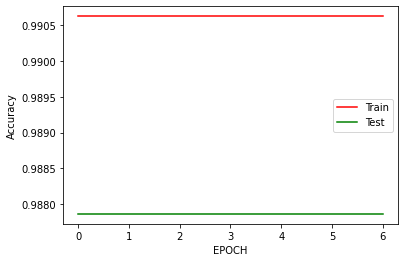

In [42]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

In [43]:
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

Using TensorFlow backend.


In [0]:
[X_train.shape ,X_test.shape,y_train.shape,y_train.shape]

[(960, 4), (412, 4), (960, 1), (960, 1)]

In [0]:
def plot():
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c=y_test,edgecolors='none')
  plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()

In [0]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size=16, epochs=1,verbose=0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()